In [1]:
import sys
from pathlib import Path
prediction_mode_path = Path("../module")
sys.path.append(prediction_mode_path.as_posix())
import models_creation as pred_model

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [2]:
pad = pd.read_excel('../Data/Kolchicyna_prepared_data.xlsx')
pad.head()

,Unnamed: 0,Publikacja DOI,Numer związku w publikacji,SMILES,Atywność [nM],A549,MCF-7,LoVo,LoVo/DX,BALB/3T3,A549_float,MCF-7_float,LoVo_float,LoVo/DX_float,BALB/3T3_float
0,0,https://doi.org/10.1016/j.bmcl.2021.128382,1,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC...,Atywność [nM],"10,8","10,3","6,5","54,9","10,2",10.8,10.3,6.5,54.9,10.2
1,1,https://doi.org/10.1016/j.bmcl.2021.128382,2,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC...,Atywność [nM],"11,6","12,0","8,5",31.1,14.3,11.6,12.0,8.5,31.1,14.3
2,2,https://doi.org/10.1016/j.bmcl.2021.128382,3,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC...,Atywność [nM],"10,9","12,2","8,8","17,9","11,7",10.9,12.2,8.8,17.9,11.7
3,3,https://doi.org/10.1016/j.bmcl.2021.128382,4,CC(C)CN[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(SC)...,Atywność [nM],"10,5","11,3","8,5","10,2","11,0",10.5,11.3,8.5,10.2,11.0
4,4,https://doi.org/10.1016/j.bmcl.2021.128382,5,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC...,Atywność [nM],"89,5","92,7","52,8","77,8","99,4",89.5,92.7,52.8,77.8,99.4


In [3]:
list(pad.columns)[10:]

['A549_float', 'MCF-7_float', 'LoVo_float', 'LoVo/DX_float', 'BALB/3T3_float']

In [4]:
molecular_descriptors_df = pred_model.prepare_data('../Data/Kolchicyna_prepared_data.xlsx')

100%|████████████████████████████████████████████████████████████████████████████████| 120/120 [00:04<00:00, 29.90it/s]


Data size (rows, columns): (120, 1613)
Data size after first reduction (rows, columns): (120, 1443)
Data size after second reduction (rows, columns): (120, 1211)


In [5]:
molecular_descriptors_df.head()

,AATS0Z,AATS0are,AATS0d,AATS0dv,AATS0i,AATS0m,AATS0p,AATS0pe,AATS0s,AATS0se,...,piPC5,piPC6,piPC7,piPC8,piPC9,A549_float,MCF-7_float,LoVo_float,LoVo/DX_float,BALB/3T3_float
0,25.090909,6.046518,3.109091,6.662626,160.775045,99.075564,1.555512,6.126680,3.435416,7.629859,...,6.098566,6.595759,6.979116,7.337313,7.681445,10.8,10.3,6.5,54.9,10.2
1,24.448276,6.008422,3.051724,6.386973,161.021674,96.473315,1.538471,6.088791,3.330998,7.596891,...,6.103048,6.601209,6.985613,7.349442,7.695531,11.6,12.0,8.5,31.1,14.3
2,23.868852,5.974074,3.000000,6.138434,161.244045,94.127025,1.523105,6.054630,3.236850,7.567166,...,6.105281,6.603923,6.989306,7.353932,7.704023,10.9,12.2,8.8,17.9,11.7
3,23.868852,5.974074,3.032787,6.171220,161.244045,94.127025,1.523105,6.054630,3.257798,7.567166,...,6.107510,6.606629,6.992068,7.361425,7.709420,10.5,11.3,8.5,10.2,11.0
4,23.343750,5.942945,2.953125,5.913194,161.445569,92.000700,1.509180,6.023670,3.151529,7.540228,...,6.107510,6.605277,6.991148,7.356489,7.707175,89.5,92.7,52.8,77.8,99.4


In [6]:
temp_li = list(pad.columns)[10:]

In [7]:
temp_li

['A549_float', 'MCF-7_float', 'LoVo_float', 'LoVo/DX_float', 'BALB/3T3_float']

In [8]:
for element in temp_li:
    molecular_descriptors_df[str(element+('_transformed'))] = pred_model.transform(molecular_descriptors_df[element])

In [9]:
molecular_descriptors_df.head()

,AATS0Z,AATS0are,AATS0d,AATS0dv,AATS0i,AATS0m,AATS0p,AATS0pe,AATS0s,AATS0se,...,A549_float,MCF-7_float,LoVo_float,LoVo/DX_float,BALB/3T3_float,A549_float_transformed,MCF-7_float_transformed,LoVo_float_transformed,LoVo/DX_float_transformed,BALB/3T3_float_transformed
0,25.090909,6.046518,3.109091,6.662626,160.775045,99.075564,1.555512,6.126680,3.435416,7.629859,...,10.8,10.3,6.5,54.9,10.2,7.966576,7.987163,8.187087,7.260428,7.991400
1,24.448276,6.008422,3.051724,6.386973,161.021674,96.473315,1.538471,6.088791,3.330998,7.596891,...,11.6,12.0,8.5,31.1,14.3,7.935542,7.920819,8.070581,7.507240,7.844664
2,23.868852,5.974074,3.000000,6.138434,161.244045,94.127025,1.523105,6.054630,3.236850,7.567166,...,10.9,12.2,8.8,17.9,11.7,7.962574,7.913640,8.055517,7.747147,7.931814
3,23.868852,5.974074,3.032787,6.171220,161.244045,94.127025,1.523105,6.054630,3.257798,7.567166,...,10.5,11.3,8.5,10.2,11.0,7.978811,7.946922,8.070581,7.991400,7.958607
4,23.343750,5.942945,2.953125,5.913194,161.445569,92.000700,1.509180,6.023670,3.151529,7.540228,...,89.5,92.7,52.8,77.8,99.4,7.048177,7.032920,7.277366,7.109020,7.002614


In [10]:
molecular_descriptors_df.to_excel('../Data/Kolchicyna_machine_learning.xlsx')

AxesSubplot(0.125,0.11;0.352273x0.77)
AxesSubplot(0.547727,0.11;0.352273x0.77)
Text(0.5, 0.98, 'Before (left) and after (right) transformation: A549_float')
AxesSubplot(0.125,0.11;0.352273x0.77)
AxesSubplot(0.547727,0.11;0.352273x0.77)
Text(0.5, 0.98, 'Before (left) and after (right) transformation: MCF-7_float')
AxesSubplot(0.125,0.11;0.352273x0.77)
AxesSubplot(0.547727,0.11;0.352273x0.77)
Text(0.5, 0.98, 'Before (left) and after (right) transformation: LoVo_float')
AxesSubplot(0.125,0.11;0.352273x0.77)
AxesSubplot(0.547727,0.11;0.352273x0.77)
Text(0.5, 0.98, 'Before (left) and after (right) transformation: LoVo/DX_float')
AxesSubplot(0.125,0.11;0.352273x0.77)
AxesSubplot(0.547727,0.11;0.352273x0.77)
Text(0.5, 0.98, 'Before (left) and after (right) transformation: BALB/3T3_float')


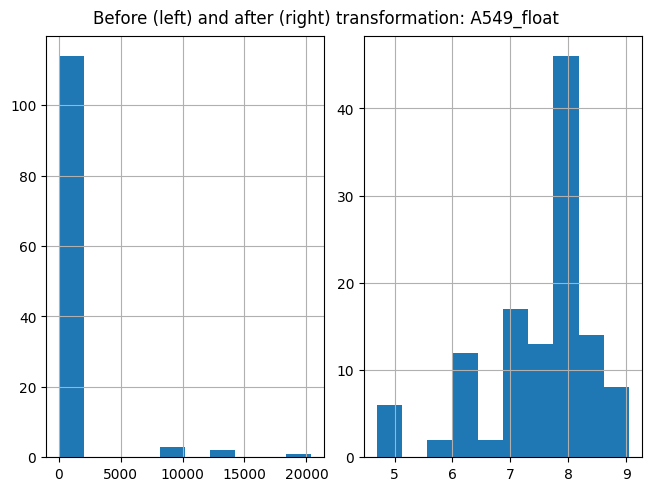

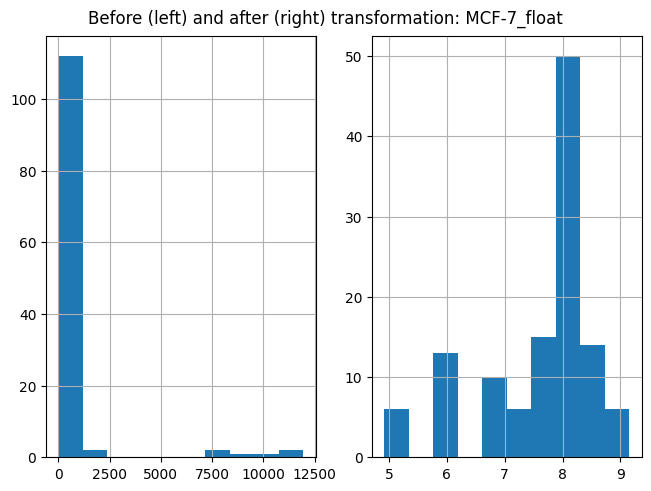

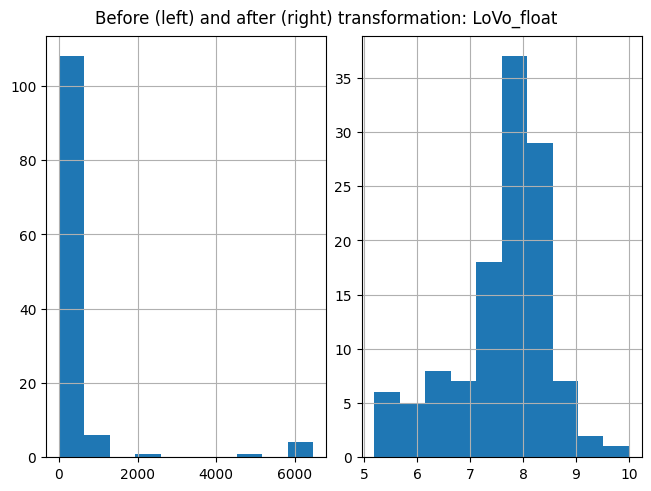

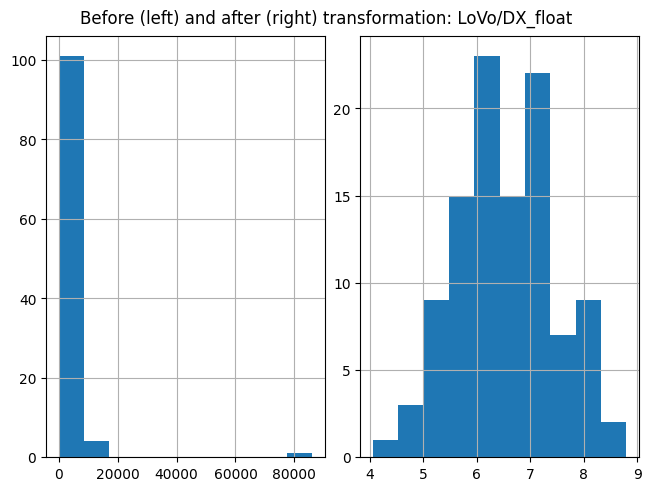

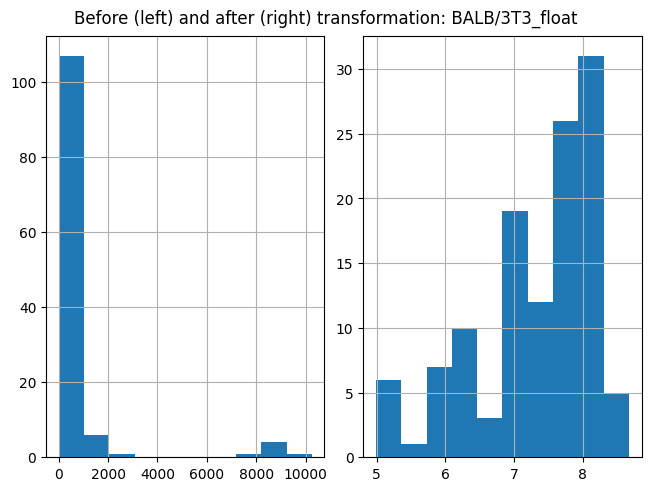

In [11]:
for hist_ in temp_li:
    fig, axes = plt.subplots(1, 2, layout="constrained")

    print(molecular_descriptors_df[hist_].hist(ax=axes[0]))
    print(molecular_descriptors_df[hist_+'_transformed'].hist(ax=axes[1]))
    print(fig.suptitle('Before (left) and after (right) transformation: '+(hist_)))